2440021451 - Oei Angela Christabel Gunawan

In [111]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#No. 1


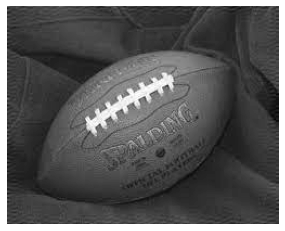

In [112]:
image = cv2.imread('football.jpg', 0)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [113]:
image.shape

(201, 251)

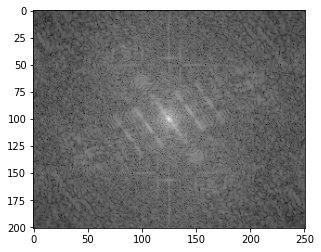

In [114]:
fft_img = np.fft.fftshift(np.fft.fft2(image))
plt.imshow(np.log(abs(fft_img)), cmap='gray')
plt.show()

Here, we create the Gaussian filter that we'll be using.

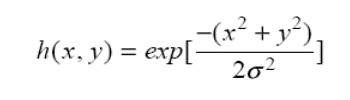

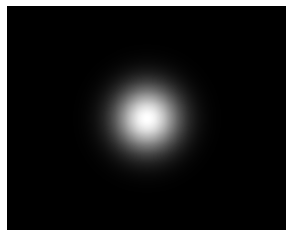

In [115]:
M, N = fft_img.shape
filter = np.zeros((M, N), dtype=np.float32)
D0 = 20

for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    filter[u, v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5, 5))
plt.imshow(filter, cmap='gray')
plt.axis('off')
plt.show()

Next, we perform element wise multiplication (convolution of the Gaussian filter and fourier transformed image).

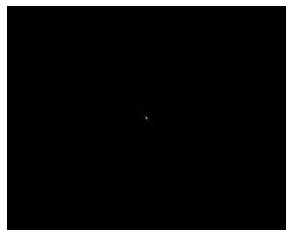

In [116]:
conv_img = filter * fft_img

plt.figure(figsize=(5, 5))
plt.imshow(abs(conv_img), cmap='gray')
plt.axis('off')
plt.show()

Lastly, we convert the result using an Inverse Fourier Transform function.

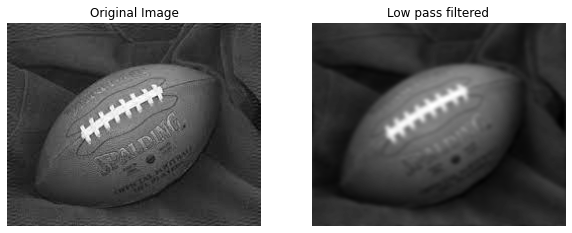

In [118]:
low_pass_img = abs(np.fft.ifft2(conv_img))

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(low_pass_img, cmap='gray')
plt.title('Low pass filtered')
plt.axis('off')

plt.show()

#No. 2

Previously, we applied a low-pass filter. Now, we'll apply a high-pass filter.

First, let's get the Fourier-Transformed image.

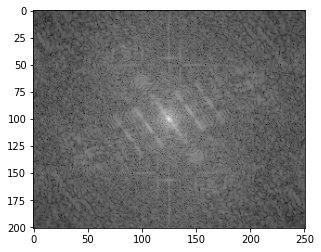

In [119]:
image = cv2.imread('football.jpg', 0)

fft_img = np.fft.fftshift(np.fft.fft2(image))
plt.imshow(np.log(abs(fft_img)), cmap='gray')
plt.show()

Next, we'll create the Gaussian filter to perform high-pass filtering.

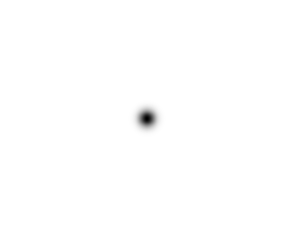

In [120]:
M, N = fft_img.shape
inv_filter = np.zeros((M, N), dtype=np.float32)
D0 = 5

for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    # inversed version of the previous filter
    inv_filter[u, v] = 1-np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5, 5))
plt.imshow(inv_filter, cmap='gray')
plt.axis('off')
plt.show()

Next, we perform element wise multiplication (convolution of the Gaussian filter and fourier transformed image).

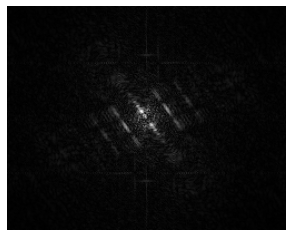

In [121]:
inv_conv_img = inv_filter * fft_img

plt.figure(figsize=(5, 5))
plt.imshow(abs(inv_conv_img), cmap='gray')
plt.axis('off')
plt.show()

Lastly, we convert the result using an Inverse Fourier Transform function.

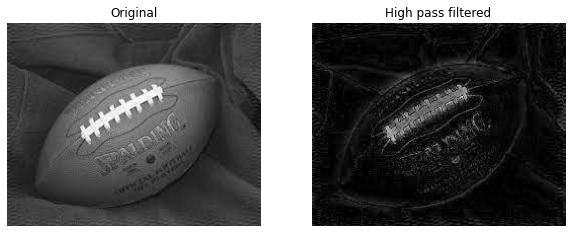

In [122]:
high_pass_img = abs(np.fft.ifft2(inv_conv_img))

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(high_pass_img, cmap='gray')
plt.title('High pass filtered')
plt.axis('off')

plt.show()

#No. 3

Here's the image that I will use for this exercise:

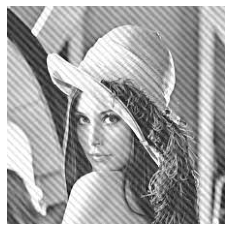

In [123]:
image = cv2.imread('lena.jpg', 0)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

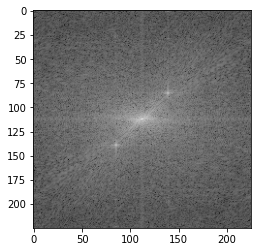

In [124]:
fft_img = np.fft.fftshift(np.fft.fft2(image))
plt.imshow(np.log(abs(fft_img)), cmap='gray')
plt.show()

From the image above, we can see that there are two white spots that represent the high-frequency recurring noise that is present in the image.

In [128]:
def notch_reject_filter(img_shape, radius=0, u_k=0, v_k=0):
  h, w = img_shape
  H = np.zeros((h, w))
  
  for u in range(h):
    for v in range(w):
      # Compute euclidean distance from D(u, v) to the center of the image
      dist = np.sqrt(((u - h)/2 + u_k)**2 + ((v - w)/2 + v_k)**2)
      inv_dist = np.sqrt(((u - h)/2 - u_k)**2 + ((v - w)/2 - v_k)**2)

      if dist <= radius or inv_dist <= radius:
        H[u, v] = 0
      else:
        H[u, v] = 1

  return H

Now, we will design a notch-reject filter fine-tuned to the image above.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


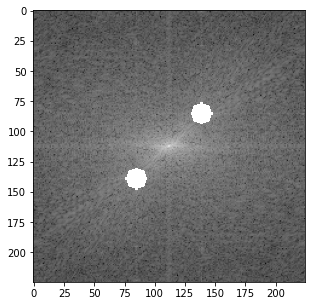

In [129]:
H1 = notch_reject_filter(image.shape, 4, 43, 70)
H2 = notch_reject_filter(image.shape, 4, 70, 43)

notch_filter = H1 * H2
notch_reject = fft_img * notch_filter

plt.figure(figsize=(5, 5))
plt.imshow(np.log(abs(notch_reject)), cmap='gray')
plt.show()

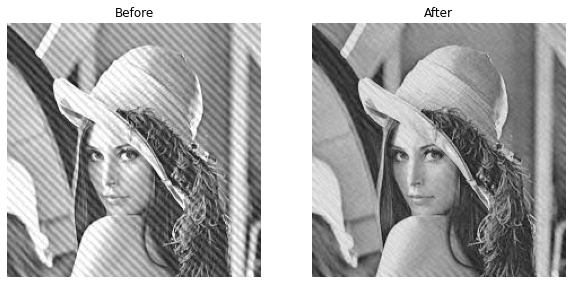

In [130]:
result = abs(np.fft.ifft2(notch_reject))

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before')
plt.axis('off')

plt.subplot(122)
plt.imshow(result, cmap='gray')
plt.title('After')
plt.axis('off')

plt.show()